<h1>Proyecto Netflix Analytics</h1>
<h2>Utilizando el poder de los datos en Netflix para descubrir tendencias reveladas</h2>
<h2>Por: Josue Smit Riveros Flores</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix_dataset.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h2> ¿Cuántas películas y series tiene Netflix? </h2>

In [5]:
total_prod = data['type'].value_counts()
total_prod

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

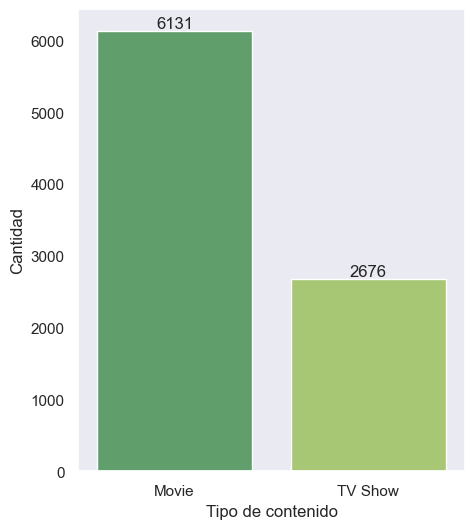

In [6]:
plt.figure(figsize=(5,6))
sns.set(style="dark")
sns.countplot(x=data['type'], data=data, palette="summer")

for i, count in enumerate(total_prod):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.ylabel('Cantidad')
plt.xlabel('Tipo de contenido')
plt.show()

<h3>Conclusión: Netflix tiene 6131 películas y 2676 series. </h3>

<h2>¿Cuál es la clasificación mas común dentro de Netflix?</h2>

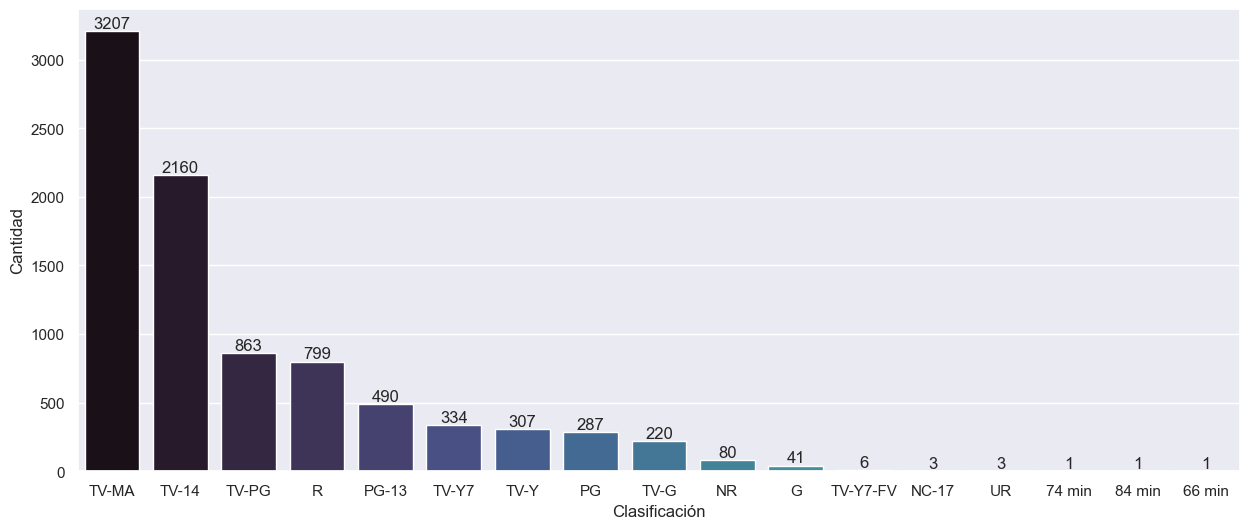

In [7]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
count_data = data['rating'].value_counts()
order = count_data.sort_values(ascending=False).index

sns.countplot(x=data['rating'], data=data, palette='mako', order=order)

for i, count in enumerate(count_data):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.ylabel('Cantidad')
plt.xlabel('Clasificación')
plt.show()

<h3>Conclusión: La clasificación mas común dentro de Netflix es TV-MA (apta solo para mayores).</h3>

<h2>¿Cuál es la clasificacion mas común respecto a películas y series?</h2>

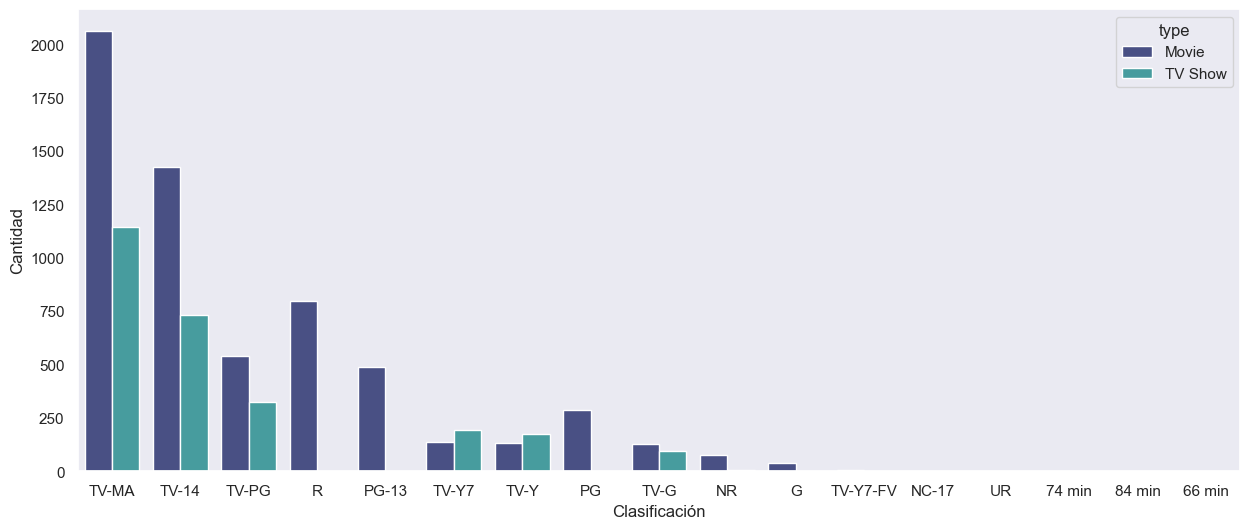

In [8]:
plt.figure(figsize=(15,6))
sns.set(style="dark")
sns.countplot(x=data['rating'], data=data, palette='mako', hue=data['type'], order=order)

plt.ylabel('Cantidad')
plt.xlabel('Clasificación')
plt.show()

<h3>Conclusión: La clasificación mas común en películas y series es TV-MA (apta solo para mayores).</h3>

<h2>Películas</h2>

In [9]:
data_movie = data[data['type'] == 'Movie']

<h2>¿Cuáles son los directores con más películas?</h2>


In [10]:
data_director = data_movie['director'].value_counts()
data_director

director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: count, Length: 4354, dtype: int64

In [11]:
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14


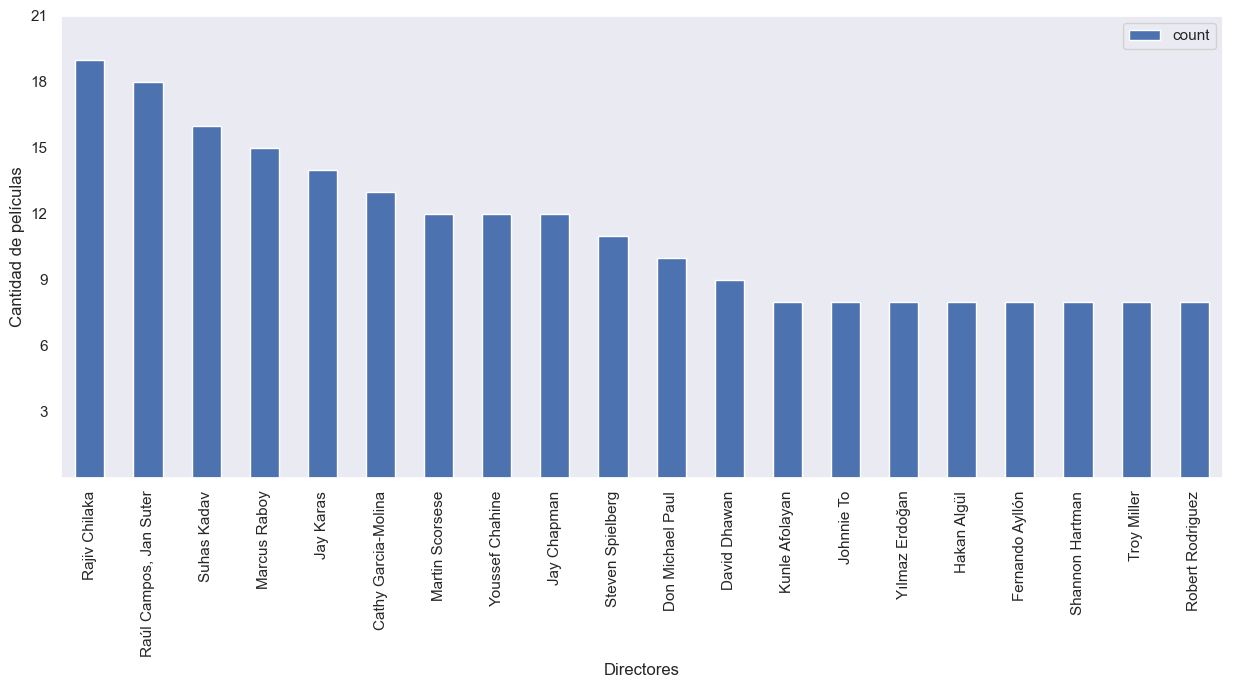

In [12]:
data_directorFrame[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de películas')
plt.xlabel('Directores')
plt.yticks([3, 6, 9, 12, 15, 18, 21])

plt.show()

<h3>Conclusión: Los directores con más películas son Rajiv Chilaka, Raúl Campos, Jan Suter y Suhas Kadav.</h3>

<h2>¿Cuáles son los actores con más películas?</h2>

In [13]:
data_movie_actor = data_movie.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_frame_actor = pd.DataFrame(data_movie_actor)
data_frame_actor.head()

,0
title,
My Little Pony: A New Generation,Vanessa Hudgens
My Little Pony: A New Generation,Kimiko Glenn
My Little Pony: A New Generation,James Marsden
My Little Pony: A New Generation,Sofia Carson
My Little Pony: A New Generation,Liza Koshy


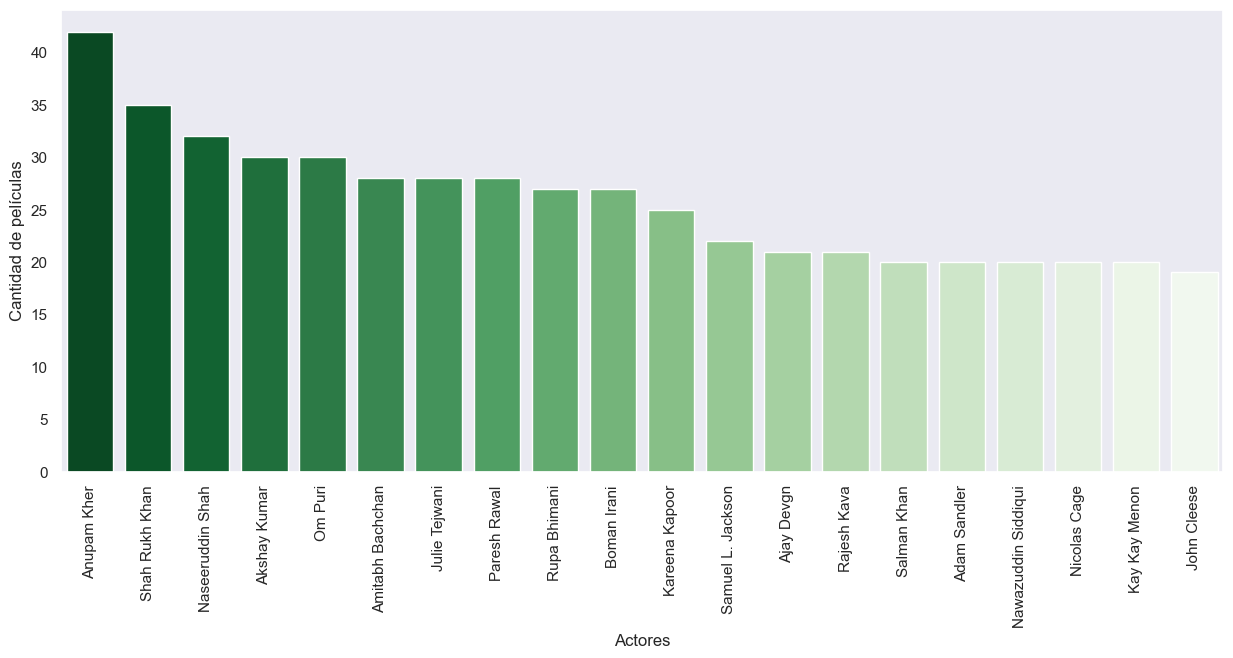

In [14]:
plt.figure(figsize=(15,6))
sns.set(style="dark")
custom_palette = sns.color_palette("Greens", n_colors=20)[::-1]
sns.countplot(x = data_movie_actor, order=data_movie_actor.value_counts().index[:20], palette=custom_palette)
plt.xticks(rotation=90)

plt.ylabel('Cantidad de películas')
plt.xlabel('Actores')
plt.show()

<h3>Conclusión: Los actores con más películas son Anupam Kher y Shah Rukh Khan.</h3>

<h2>¿Cuáles son los géneros con más películas?</h2>

In [15]:
data_movie_list_in = data_movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_movie_list_in

title
Dick Johnson Is Dead                           Documentaries
My Little Pony: A New Generation    Children & Family Movies
Sankofa                                               Dramas
Sankofa                                   Independent Movies
Sankofa                                 International Movies
                                              ...           
Zoom                                Children & Family Movies
Zoom                                                Comedies
Zubaan                                                Dramas
Zubaan                                  International Movies
Zubaan                                      Music & Musicals
Length: 13190, dtype: object

In [16]:
top_list_in = data_movie_list_in.value_counts()
top_list_in

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

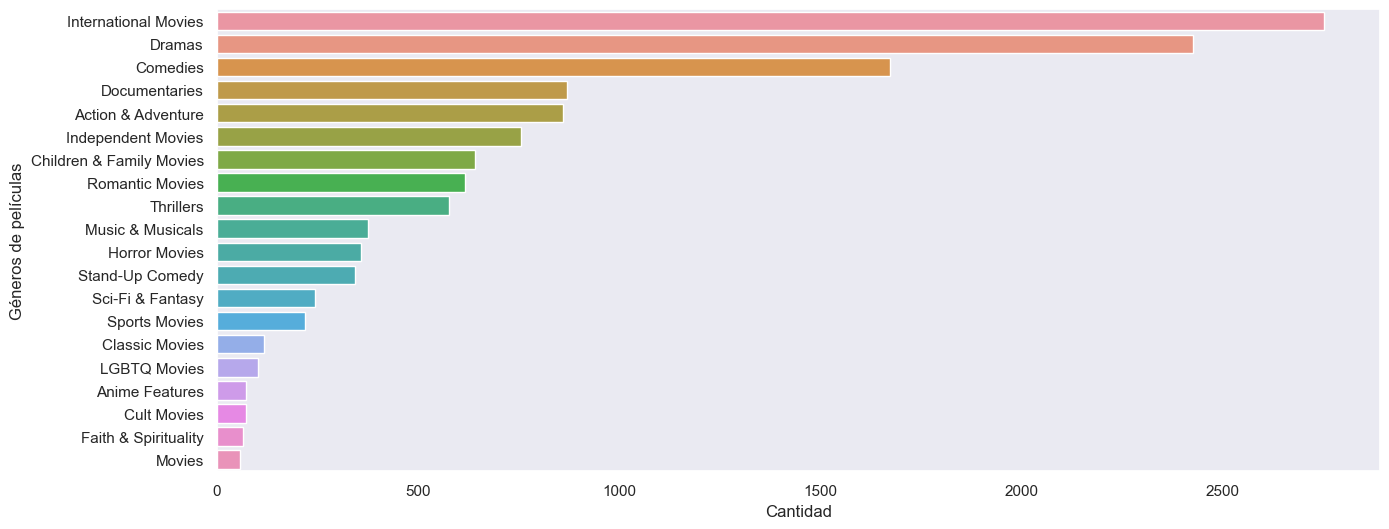

In [17]:
plt.figure(figsize=(15,6))
sns.set(style="dark")
sns.countplot(y = data_movie_list_in, order=data_movie_list_in.value_counts().index[:20])

plt.ylabel('Géneros de películas')
plt.xlabel('Cantidad')
plt.show()

<h3>Conclusión: Los géneros con más películas son International Movies, Dramas y Comedies.</h3>

<h2>¿En qué años hubo más producciones de películas?</h2>

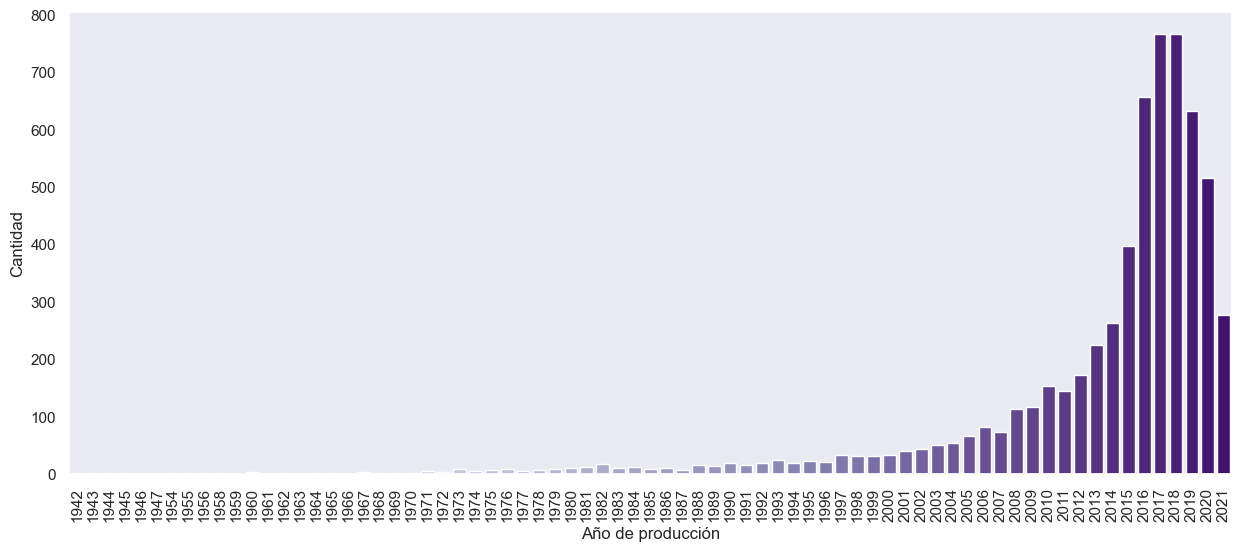

In [18]:
plt.figure(figsize=(15,6))
custom_palette = sns.color_palette("Purples", n_colors=20)[::-1]
sns.countplot(x=data_movie['release_year'], data=data_movie, palette="Purples")
sns.set(style="darkgrid")
plt.xticks(rotation=90)

plt.ylabel('Cantidad')
plt.xlabel('Año de producción')
plt.show()

<h3>Conclusión: En los años 2016, 2017 y 2018 hubo más producciones de películas.</h3>

<h2>¿Qué países tienen la mayor cantidad de películas producidas?</h2>

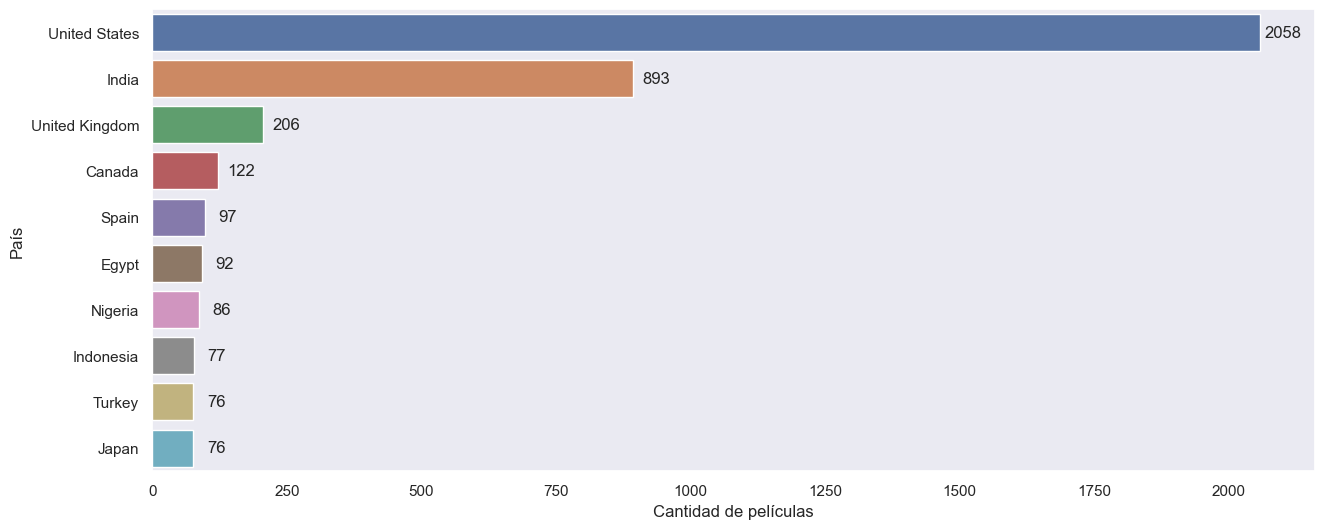

In [19]:
plt.figure(figsize=(15,6))
sns.set(style="dark")
ax = sns.countplot(y='country', data=data_movie, order=data_movie['country'].value_counts().index[:10])

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 30, p.get_y() + p.get_height() / 2),
            ha="center", va='center', xytext = (5, 0), textcoords='offset points')
  

plt.ylabel('País')
plt.xlabel('Cantidad de películas')
plt.show()

<h3>Conclusión: Estados Unidos y la India son los países con mayor producción de películas</h3>

<h2>Series de TV</h2>

In [20]:
data_tv = data[data['type'] == 'TV Show']

<h2>¿Qué director ha producido más series de TV?</h2>

In [21]:
data_director = data_tv['director'].value_counts()
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,count
director,
Alastair Fothergill,3
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2


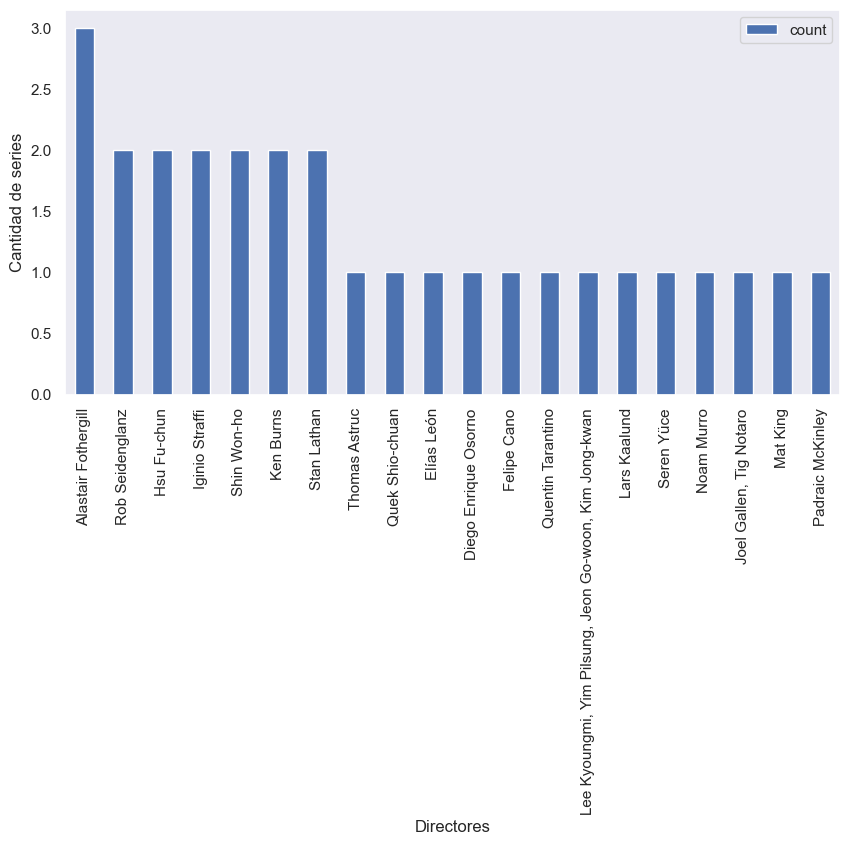

In [22]:
data_directorFrame[:20].plot(kind='bar', figsize=[10,5])
plt.ylabel('Cantidad de series')
plt.xlabel('Directores')
plt.show()

<h3>Conclusión: El director que ha producido más series de TV es Alastair Fothergill.</h3>

<h2>¿Qué actor tiene más participación en series de TV?</h2>

In [23]:
data_tv_actor = data_tv.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_actors_tv = data_tv_actor.value_counts()
top_actors_tv

Takahiro Sakurai         25
Yuki Kaji                19
Daisuke Ono              17
Junichi Suwabe           17
Ai Kayano                17
                         ..
Bhumibhat Thavornsiri     1
Thanongsak Suphakan       1
Kanjanaporn Plodpai       1
Boonsong Nakphoo          1
Hina Khawaja Bayat        1
Name: count, Length: 14863, dtype: int64

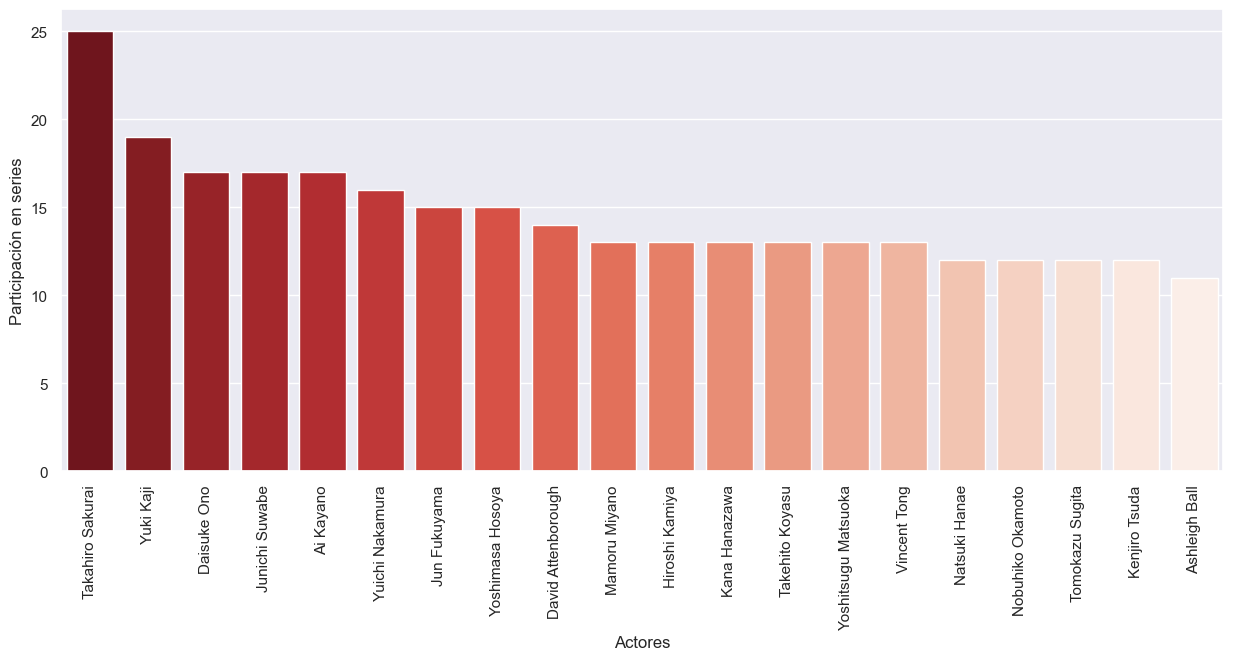

In [24]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")

custom_palette = sns.color_palette("Reds", n_colors=20)[::-1]
sns.countplot(x = data_tv_actor, order=top_actors_tv.index[:20], palette=custom_palette)
plt.xticks(rotation=90)


plt.ylabel('Participación en series')
plt.xlabel('Actores')
plt.show()

<h3>Conclusión: El actor con más participación en series de TV es Takashiro Sakurai.</h3>

<h2>¿Cuales son los géneros más comunes en Series de TV?</h2>

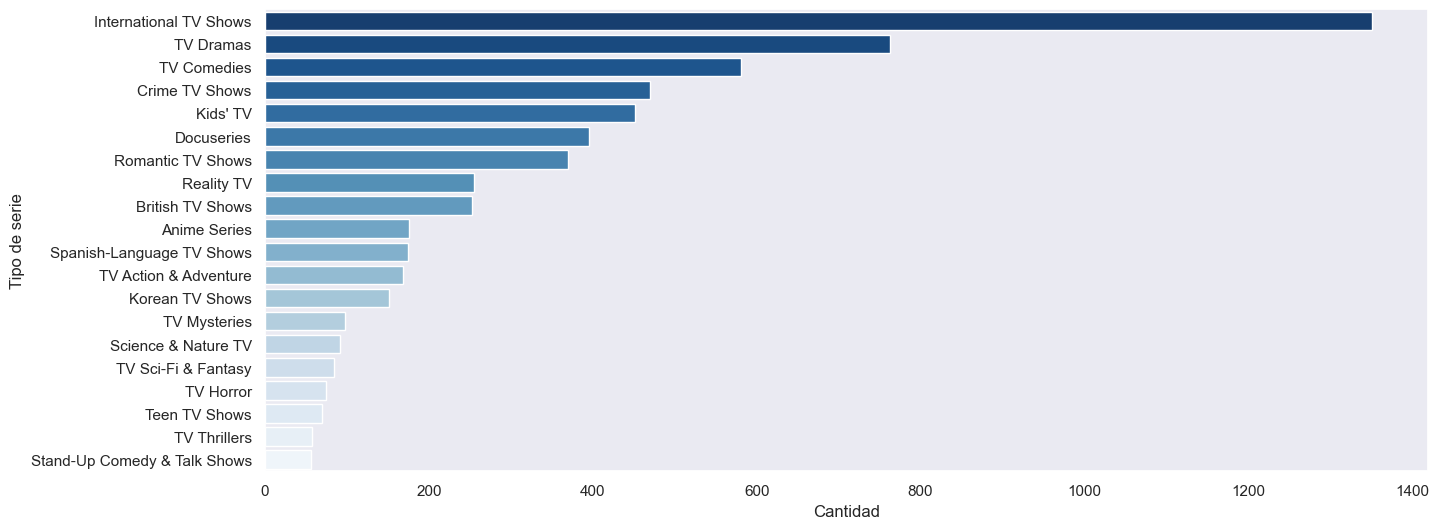

In [25]:
plt.figure(figsize=(15,6))
sns.set(style="dark")
data_tv_list_in = data_tv.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
custom_palette = sns.color_palette("Blues", n_colors=20)[::-1]
sns.countplot(y = data_tv_list_in, order=data_tv_list_in.value_counts().index[:20], palette=custom_palette)

plt.ylabel('Tipo de serie')
plt.xlabel('Cantidad')
plt.show()

<h3>Conclusión: Los géneros más comunes en series de TV son International TV Shows, TV Dramas y TV Comedies.</h3>

<h2>¿En qué años se produjeron más series de TV?</h2>

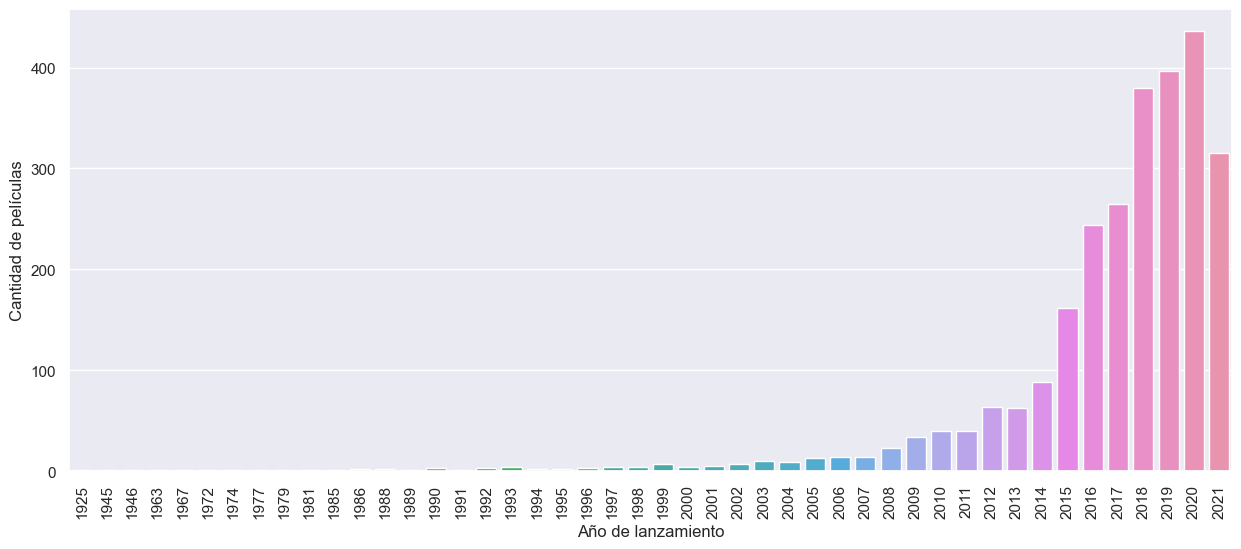

In [26]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.countplot(x=data_tv['release_year'], data=data_tv)


plt.ylabel('Cantidad de películas')
plt.xlabel('Año de lanzamiento')
plt.xticks(rotation=90)
plt.show()

<h3>Conclusión: En los años 2018, 2019 y 2020 se produjeron más series de TV.</h3>

<h2>¿Qué países tienen la mayor cantidad de series de TV producidas?</h2>

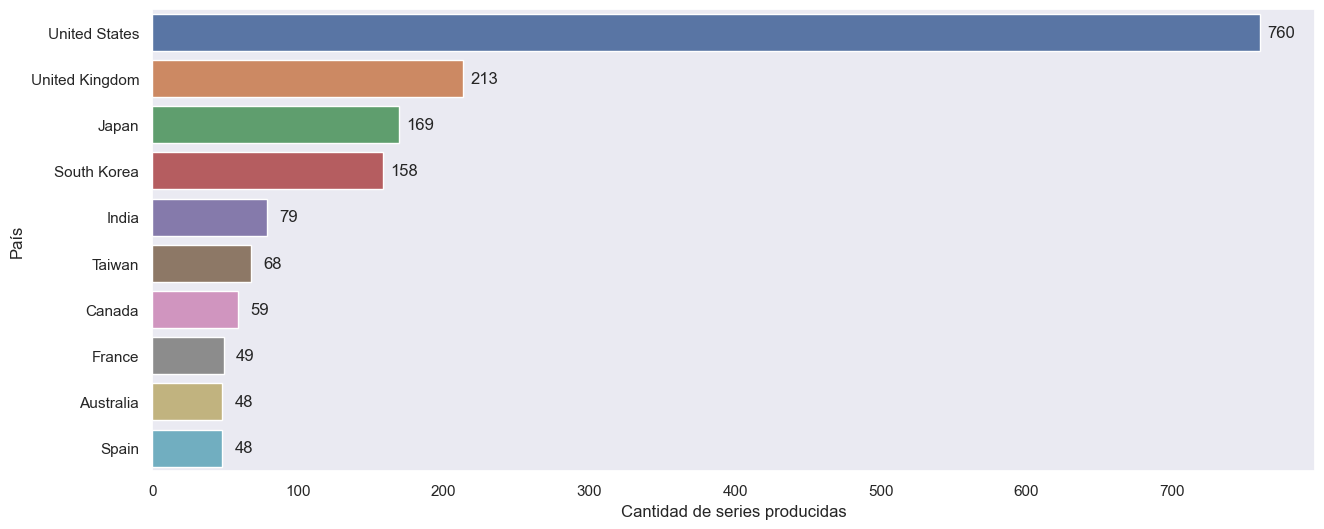

In [27]:
plt.figure(figsize=(15,6))
sns.set(style="dark")
ax = sns.countplot(y='country', data=data_tv, order=data_tv['country'].value_counts().index[:10])

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 10, p.get_y() + p.get_height() / 2),
            ha="center", va='center', xytext = (5, 0), textcoords='offset points')
  

plt.ylabel('País')
plt.xlabel('Cantidad de series producidas')
plt.show()

<h3>Conclusión: Los países con mayor producción de series de TV son Estados Unidos, Reino Unido y Japón.</h3>